In [27]:
import pandas as pd
import folium
from folium.plugins import HeatMap
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno


### Dataset Description - Active Food Establishment Licenses

The Health Division of the Department of Inspectional Services (ISD) creates and enforces food safety codes to protect public health. All businesses which prepare and sell food to the public must possess a food service permit. In order to qualify for a permit, at least one full time employee must be must be certified through an accredited food manager program, which provides guidance on handling and serving food to the public.

This dataset contains a list of restaurants that met the City's standards to become licensed food service establishments.

In [10]:
Food = pd.read_csv("FoodEstablishmentLicense.CSV")
Food.head()


,BusinessName,DBAName,Address,CITY,State,ZIP,LICSTATUS,LICENSECAT,DESCRIPT,LicenseAddDtTm,dayphn,Property_ID,Latitude,Longitude
0,# 7 RESTAURANT,NaN,225 Grove,West Roxbury,MA,02132,Active,FT,Eating & Drinking w/ Take Out,2007-03-23 15:20:59,10000000000,156965.0,42.261873,-71.15741
1,100 Federal Market & Barista- 11th Floor,NaN,100 Federal,Boston,MA,02110,Active,FT,Eating & Drinking w/ Take Out,2021-01-12 10:37:24,16174345000,57150.0,42.354770,-71.05613
2,100 Percent Delicias Express,NaN,656 Centre,Jamaica Plain,MA,02130,Active,FT,Eating & Drinking w/ Take Out,2017-11-28 10:27:47,18572505689,28152.0,42.312830,-71.11386
3,11 Dining -16th Fl.,NaN,200 Berkeley,Boston,MA,02116,Active,FS,Eating & Drinking,2019-12-20 09:32:17,10000000000,187943.0,42.349860,-71.07291
4,110 Grill,NaN,25 Jan Karski,Dorchester,MA,02125,Active,FS,Eating & Drinking,2018-11-29 14:14:04,19786929450,421286.0,0.000000,0.00000


In [12]:
print(Food.shape) # 3025, 14
Food.describe()

(3026, 14)


,dayphn,Property_ID,Latitude,Longitude
count,3.026000e+03,2642.000000,3026.000000,3026.000000
mean,1.536904e+10,193540.961014,27.089029,-45.477134
std,2.475308e+09,126974.107783,20.329469,34.129158
min,1.000000e+10,0.000000,0.000000,-71.172610
25%,1.617237e+10,110171.750000,0.000000,-71.082482
50%,1.617464e+10,156937.000000,42.331078,-71.055980
75%,1.617756e+10,341359.250000,42.351362,0.000000
max,1.978923e+10,454247.000000,42.395173,0.000000


### Detect Missing Values & Zero values

DBAName           2990
Property_ID        384
BusinessName         0
Address              0
CITY                 0
State                0
ZIP                  0
LICSTATUS            0
LICENSECAT           0
DESCRIPT             0
LicenseAddDtTm       0
dayphn               0
Latitude             0
Longitude            0
dtype: int64


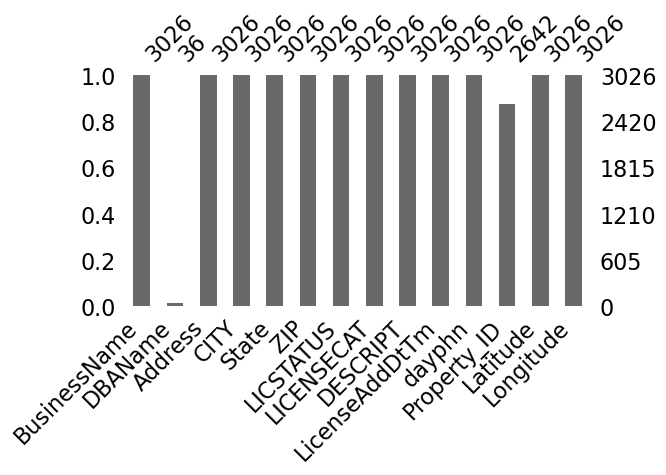

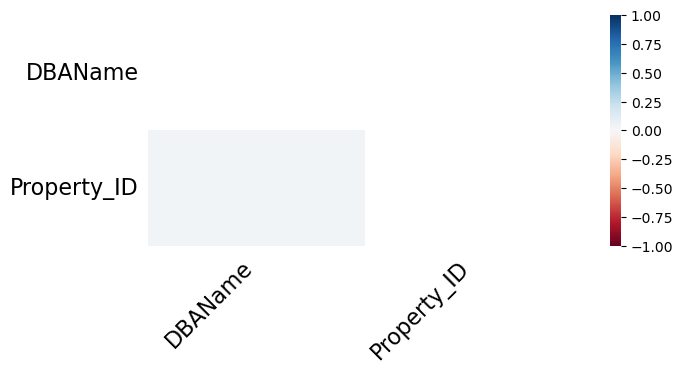

In [28]:
print(Food.isnull().sum().sort_values(ascending=False)) 
  
# msno可以用于检测缺失值
msno.bar(Food,figsize=(6,3)) # bar chart
#plt.show()
msno.heatmap(Food,figsize=(7,3)) 
#heatmap
plt.show()

In [88]:
Food.loc[:,(Food==0).any()].columns

Index(['Property_ID', 'Latitude', 'Longitude'], dtype='object')

There are only missing values in the columns DBAName and Property_ID. And there are zero values in Latitude and Longitude.

In [94]:
Food_clear = Food.drop(Food[(Food['Latitude'] == 0) | (Food['Longitude'] == 0)].index)
Food_clear

,BusinessName,DBAName,Address,CITY,State,ZIP,LICSTATUS,LICENSECAT,DESCRIPT,LicenseAddDtTm,dayphn,Property_ID,Latitude,Longitude
0,# 7 RESTAURANT,NaN,225 Grove,West Roxbury,MA,02132,Active,FT,Eating & Drinking w/ Take Out,2007-03-23 15:20:59,10000000000,156965.0,42.261873,-71.157410
1,100 Federal Market & Barista- 11th Floor,NaN,100 Federal,Boston,MA,02110,Active,FT,Eating & Drinking w/ Take Out,2021-01-12 10:37:24,16174345000,57150.0,42.354770,-71.056130
2,100 Percent Delicias Express,NaN,656 Centre,Jamaica Plain,MA,02130,Active,FT,Eating & Drinking w/ Take Out,2017-11-28 10:27:47,18572505689,28152.0,42.312830,-71.113860
3,11 Dining -16th Fl.,NaN,200 Berkeley,Boston,MA,02116,Active,FS,Eating & Drinking,2019-12-20 09:32:17,10000000000,187943.0,42.349860,-71.072910
8,1928 Beacon Hill,NaN,97 Mount Vernon,Boston,MA,02108,Active,FS,Eating & Drinking,2021-10-05 12:30:10,18572335662,98781.0,42.358060,-71.069720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3018,Zaz Restaurant,NaN,1230 River,Hyde Park,MA,02136,Active,FS,Eating & Drinking,2012-09-05 10:03:01,16172723083,169177.0,42.255789,-71.122989
3019,Zaz Restaurant & Catering Corp.,NaN,1 City Hall,Boston,MA,02201,Active,FS,Eating & Drinking,2022-04-05 14:55:29,16176370327,340817.0,42.360116,-71.057900
3021,ZESTO'S PIZZA,NaN,460 Centre,Jamaica Plain,MA,02130,Active,FT,Eating & Drinking w/ Take Out,2011-04-28 08:54:10,16175242004,28061.0,42.319350,-71.111540
3023,Zo,NaN,92 State,Boston,MA,02109,Active,FT,Eating & Drinking w/ Take Out,2011-12-16 09:44:46,16179016017,170003.0,42.359232,-71.055320


In [93]:
print(Food_clear.shape) # 1936 x 14
Food_clear.describe()

(1936, 14)


,dayphn,Property_ID,Latitude,Longitude
count,1.936000e+03,1936.000000,1936.000000,1936.000000
mean,1.539723e+10,130398.958161,42.340600,-71.081512
std,2.428162e+09,74933.239901,0.026632,0.034597
min,1.000000e+10,61.000000,42.237125,-71.172610
25%,1.617246e+10,76237.000000,42.335631,-71.102201
50%,1.617442e+10,155809.500000,42.349190,-71.071406
75%,1.617739e+10,157492.000000,42.356100,-71.057105
max,1.978923e+10,345314.000000,42.395173,-70.996730


### Distribution of food businesses by city

In [188]:
# Contains samples without latitude and longitude
print(Food_clear.LICSTATUS.value_counts()) # all Active
print(Food.CITY.value_counts())


Active    1936
Name: LICSTATUS, dtype: int64
Boston                         1568
Dorchester                      210
East Boston                     181
Roxbury                         141
Brighton                        137
Allston                         127
BOSTON                          117
Jamaica Plain                    88
South Boston                     87
Roslindale                       55
West Roxbury                     53
Charlestown                      34
Hyde Park                        33
Mission Hill                     31
Mattapan                         31
DORCHESTER                       26
EAST BOSTON                      18
BRIGHTON                         12
ALLSTON                          11
East Boston/                      8
SOUTH BOSTON                      8
ROXBURY                           7
JAMAICA PLAIN                     5
WEST ROXBURY                      5
                                  5
Financial District                4
ROSLINDALE         

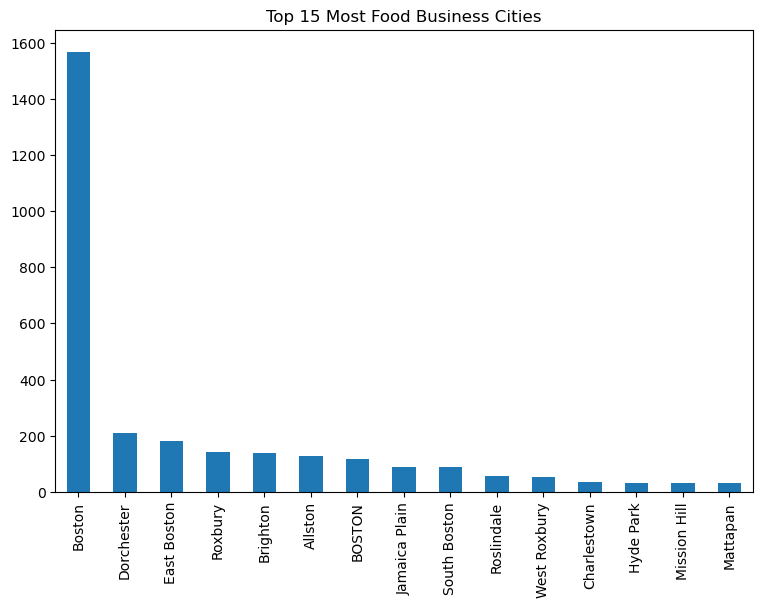

In [189]:
plt.figure(figsize=(9,6))
Food.CITY.value_counts(sort=True).nlargest(15).plot.bar()
plt.title('Top 15 Most Food Business Cities')
plt.show()

Max is 1568 and there are 6 cities with between 100 and 200 food businesses.

In [190]:
Food.CITY.sort_values

<bound method Series.sort_values of 0        West Roxbury
1              Boston
2       Jamaica Plain
3              Boston
4          Dorchester
            ...      
3021    Jamaica Plain
3022         Brighton
3023           Boston
3024           Boston
3025      Charlestown
Name: CITY, Length: 3026, dtype: object>

In [181]:
# Boston Basemap
basemap = folium.Map(
    location = [42.3601, -71.0589],
    zoom_start = 10,
    detect_retina = True,
    control_scale = False,
    titles = 'Top 10 most food business cities',
)


# label all food business with latitude & longitude on map
for loc in list(zip(Food_clear['Latitude'], Food['Longitude'])):
    folium.CircleMarker(
        location = [loc[0], loc[1]],
        radius=3,
        color = 'green'
        ).add_to(basemap)

basemap.save('BostonFoodBusiness.html')

In [191]:
# remove the samples without latitude and longitude
FoodNum = Food_clear.CITY.value_counts()
print(FoodNum)

Boston           1026
Dorchester        154
Brighton          109
Roxbury           109
East Boston       105
Allston           100
Jamaica Plain      74
South Boston       65
West Roxbury       46
Roslindale         43
Hyde Park          28
Mattapan           26
Mission Hill       25
Charlestown        23
BOSTON              1
South End           1
Chestnut Hill       1
Name: CITY, dtype: int64


In [200]:
FoodIndex= pd.Series(FoodNum.index)
FoodCount = pd.Series(FoodNum.values)
FoodCity = {'city': FoodIndex, 'Num':FoodCount}
FoodCity = pd.DataFrame(FoodCity)
FoodCity

,city,Num
0,Boston,1026
1,Dorchester,154
2,Brighton,109
3,Roxbury,109
4,East Boston,105
5,Allston,100
6,Jamaica Plain,74
7,South Boston,65
8,West Roxbury,46
9,Roslindale,43


In [217]:
num0 = FoodCity[FoodCity['Num'] > 1000]['city'].value_counts()
num1 = FoodCity[(FoodCity['Num'] > 100) & (FoodCity['Num'] < 200) ]['city'].value_counts()
num2 = FoodCity[(FoodCity['Num'] > 30) & (FoodCity['Num'] < 100)]['city'].value_counts()
num3 = FoodCity[(FoodCity['Num'] > 0) & (FoodCity['Num'] < 30)]['city'].value_counts()

labels = '> 1000', '> 100', '> 30', '< 30'
sizes = [num0.values.sum(), num1.values.sum(), num2.values.sum(), num3.values.sum()]
print(sizes)

[1, 4, 4, 7]


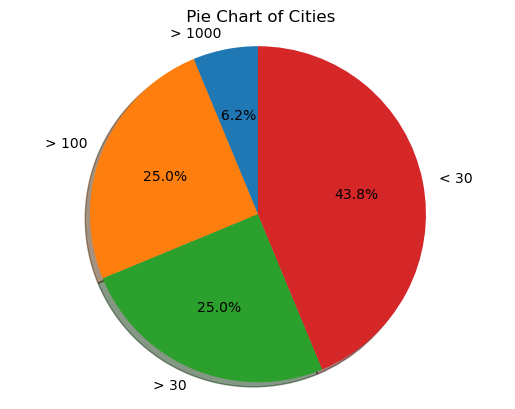

In [216]:
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal') 
plt.title(' Pie Chart of Cities')
plt.show()

In [219]:
FoodNum = Food_clear[['Latitude', 'Longitude', 'CITY']].groupby(['CITY']).value_counts()
FoodNum

CITY          Latitude   Longitude 
Allston       42.352411  -71.125329    9
              42.367592  -71.125878    3
              42.355123  -71.134062    2
              42.353081  -71.130624    2
              42.352400  -71.128810    2
                                      ..
West Roxbury  42.283522  -71.156610    1
              42.280727  -71.157951    1
              42.280288  -71.158001    1
              42.280014  -71.158191    1
              42.294130  -71.136740    1
Length: 1579, dtype: int64